# Problem statement 

A large Toyoto car dealership rolled out used cars exchange offer for a new car. The data was collected on all previous sales of used Toyoto cars at the dealership. To ensure a reasonable profit, the dealer needs to be able to predict the price that the dealership will get for used cars.

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sn

C:\Users\91982\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the dataset

In [2]:
car_df = pd.read_csv("Toyoto_Corrola.csv")

In [3]:
car_df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

#### Renaming the column Age_08_04 to Age 

In [4]:
car_new_df = car_df.rename(columns={'Age_08_04':'Age'})

In [5]:
car_new_df.head()

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


We can see that the column Age is renamed now. We renamed the column Age for better readability

#### Dropping the column ID 

In [6]:
car_price= car_new_df.drop('Id',axis=1)


In [7]:
car_price.head()

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


We can see the columnd ID is dropped from the data. We dropped the column Id as we already have a index position with us in the id form.

# Data Insights

In [8]:
car_price.shape

(1436, 9)

In [9]:
car_price.columns

Index(['Model', 'Price', 'Age', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

### Observations :- 

In [10]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Price      1436 non-null   int64 
 2   Age        1436 non-null   int64 
 3   KM         1436 non-null   int64 
 4   HP         1436 non-null   int64 
 5   Doors      1436 non-null   int64 
 6   Cylinders  1436 non-null   int64 
 7   Gears      1436 non-null   int64 
 8   Weight     1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 101.1+ KB


### Observations :- 

1. We can see that apart from Model column which is of object type, all other columns are of int64 data type.
2. Also all the 1436 observations are non-null type, which means we don't have any missing values in our data.

In [11]:
car_price[car_price.duplicated()]

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight


We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

# Summary statistics

In [12]:
car_price.describe()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


### Observations :- 

1. The mean value and the median value (50% percentile) are not having much difference between them for all the columns.
2. There is not a big difference in the 75% value and max value for all the columns except Marketing Spend column. For Marketing Spend, the 75% value is at 299469 but max value is 471784 (almost double)
3. From observations 1 and 2, it looks like there is no outlier for R&D Spend, Administration and Profit. However, we can say there is a chance of outlier in Marketing Spend column. But we will be confirming that below with some other techniques (boxplot) as well.

# Understanding the target variable

We have to make a prediction model to predict the Price of cars which dealer will get after selling cars. So in this case our target variable is Profit.

In [13]:
car_price['Price'].unique()

array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8500,
        8950,  9250,

The Price here is continuous variable (numerica data)

In [14]:
car_price['Price'].value_counts()

8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
6990       1
6999       1
17250      1
9130       1
9245       1
Name: Price, Length: 236, dtype: int64

### Observations :-

1. We could see that the car prices are same for many cars. 
2. 109 cars have the same price of 8950, 84 cars with same price of 9950, etc.

# Data visualization 

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data 

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

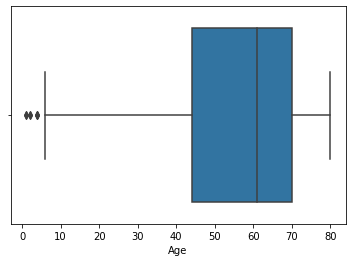

In [15]:
sn.boxplot(car_price['Age'])

### Observations :- 

1. The boxplot of Age columns shows that the values of Age ranges from 0 to 80 (approximately). 
2. The median line is towards the lower half of the box, which means the data is negatively skewed.
3. There are few outlier points which are less than value of 10.

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='KM'>

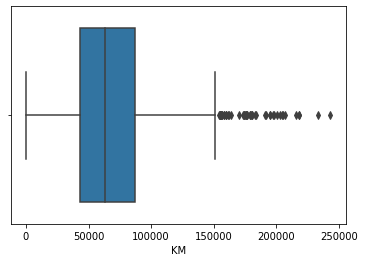

In [16]:
sn.boxplot(car_price['KM'])

### Observations :- 

1. The values of KM ranges from 0 to 150000 (approximately).
2. There are lot of outlier data points 

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HP'>

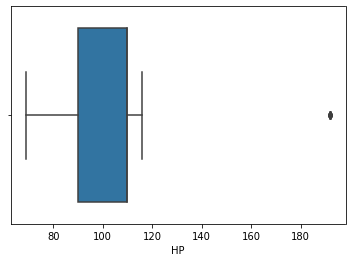

In [17]:
sn.boxplot(car_price['HP'])

### Observations :- 

1. The values of HP ranges from 70 to 120 (approximately).
2. There is an outlier data point with a value of more than 180.
3. The median line and 75% percentile line are overlapping with each other.

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Doors'>

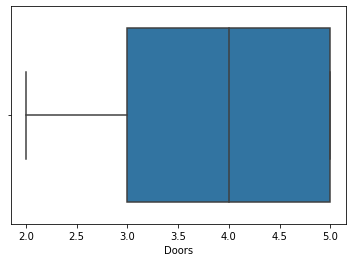

In [18]:
sn.boxplot(car_price['Doors'])

### Observations :-

1. The values of Doors ranges from 2 to 5.
2. There are no outlier data points.
3. The 75 % value is equal to the max value so  there is no upper whisker line in the boxplot

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cylinders'>

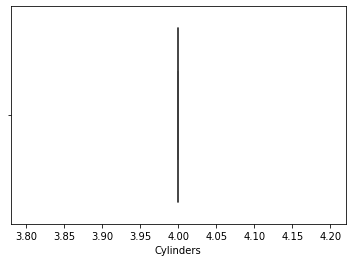

In [19]:
sn.boxplot(car_price['Cylinders'])

### Observations :- 

1. We can see only a single line for Cylinder which means all the data points have the same value of 4.

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gears'>

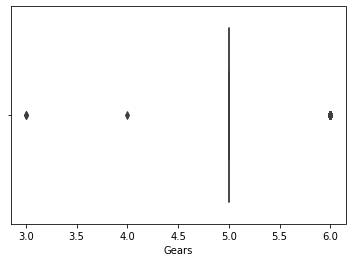

In [20]:
sn.boxplot(car_price['Gears'])

### Observations :-

1. We can see only a single line  and few points for Gears which means almost all the data points have the same value of 5.
2. We have 3 outliers points 

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Weight'>

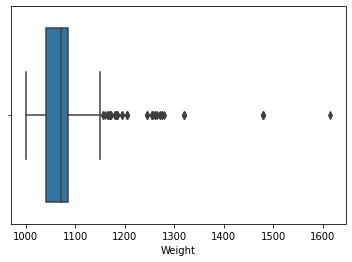

In [21]:
sn.boxplot(car_price['Weight'])

### Observations :- 

1. The Weight value ranges from 1000 to 1500 (approx) 
2. There are outlier data points 

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

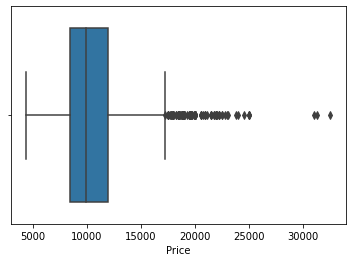

In [22]:
sn.boxplot(car_price['Price'])

### Observations :- 

1. The boxplot shows the lower whiser value from 5000 to 17000 (approx.)
2. There are many outlier data points

### Dist plots

Dist plots are used to check the distribution of the data, peak value(the observation having the highest frequecy) and check for skewness in the data

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

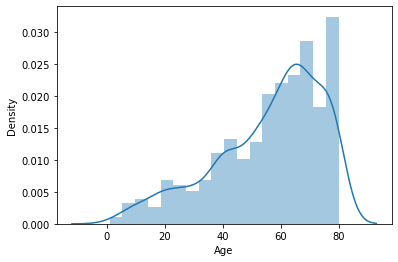

In [23]:
sn.distplot(car_price['Age'])

### Observations :-

We can see there is a negative skewness in the Age data

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

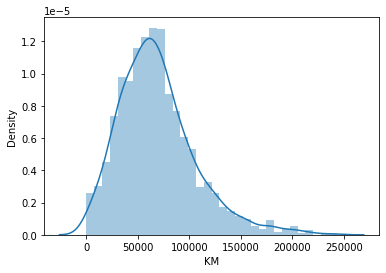

In [24]:
sn.distplot(car_price['KM'])

### Observations :- 

We can see there is a positive skewness in the data in KM feature

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

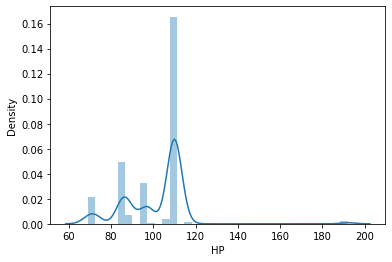

In [25]:
sn.distplot(car_price['HP'])

### Observations :- 

We can see the data is very highly positive skewed

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

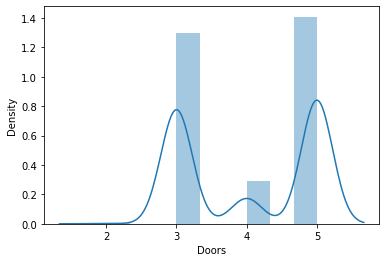

In [26]:
sn.distplot(car_price['Doors'])

### Observations :- 

1. The data distribution is bimodal. There are lot of data points having both values 3 and 5

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Cylinders', ylabel='Density'>

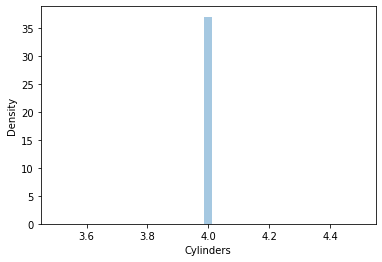

In [27]:
sn.distplot(car_price['Cylinders'])

### Observations :- 

All the data points are having same value of 4.

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

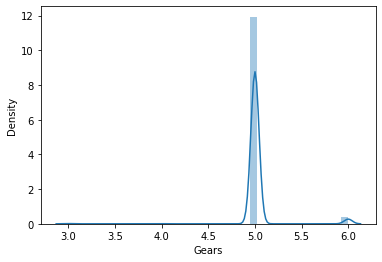

In [28]:
sn.distplot(car_price['Gears'])

### Observations :- 

The data is spread from 3 to 6 but most of the data points are having a value of 5

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

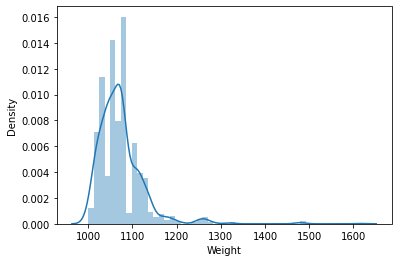

In [29]:
sn.distplot(car_price['Weight'])

### Observations :- 

We can see the data is highliy positively skewed

### Pair plots

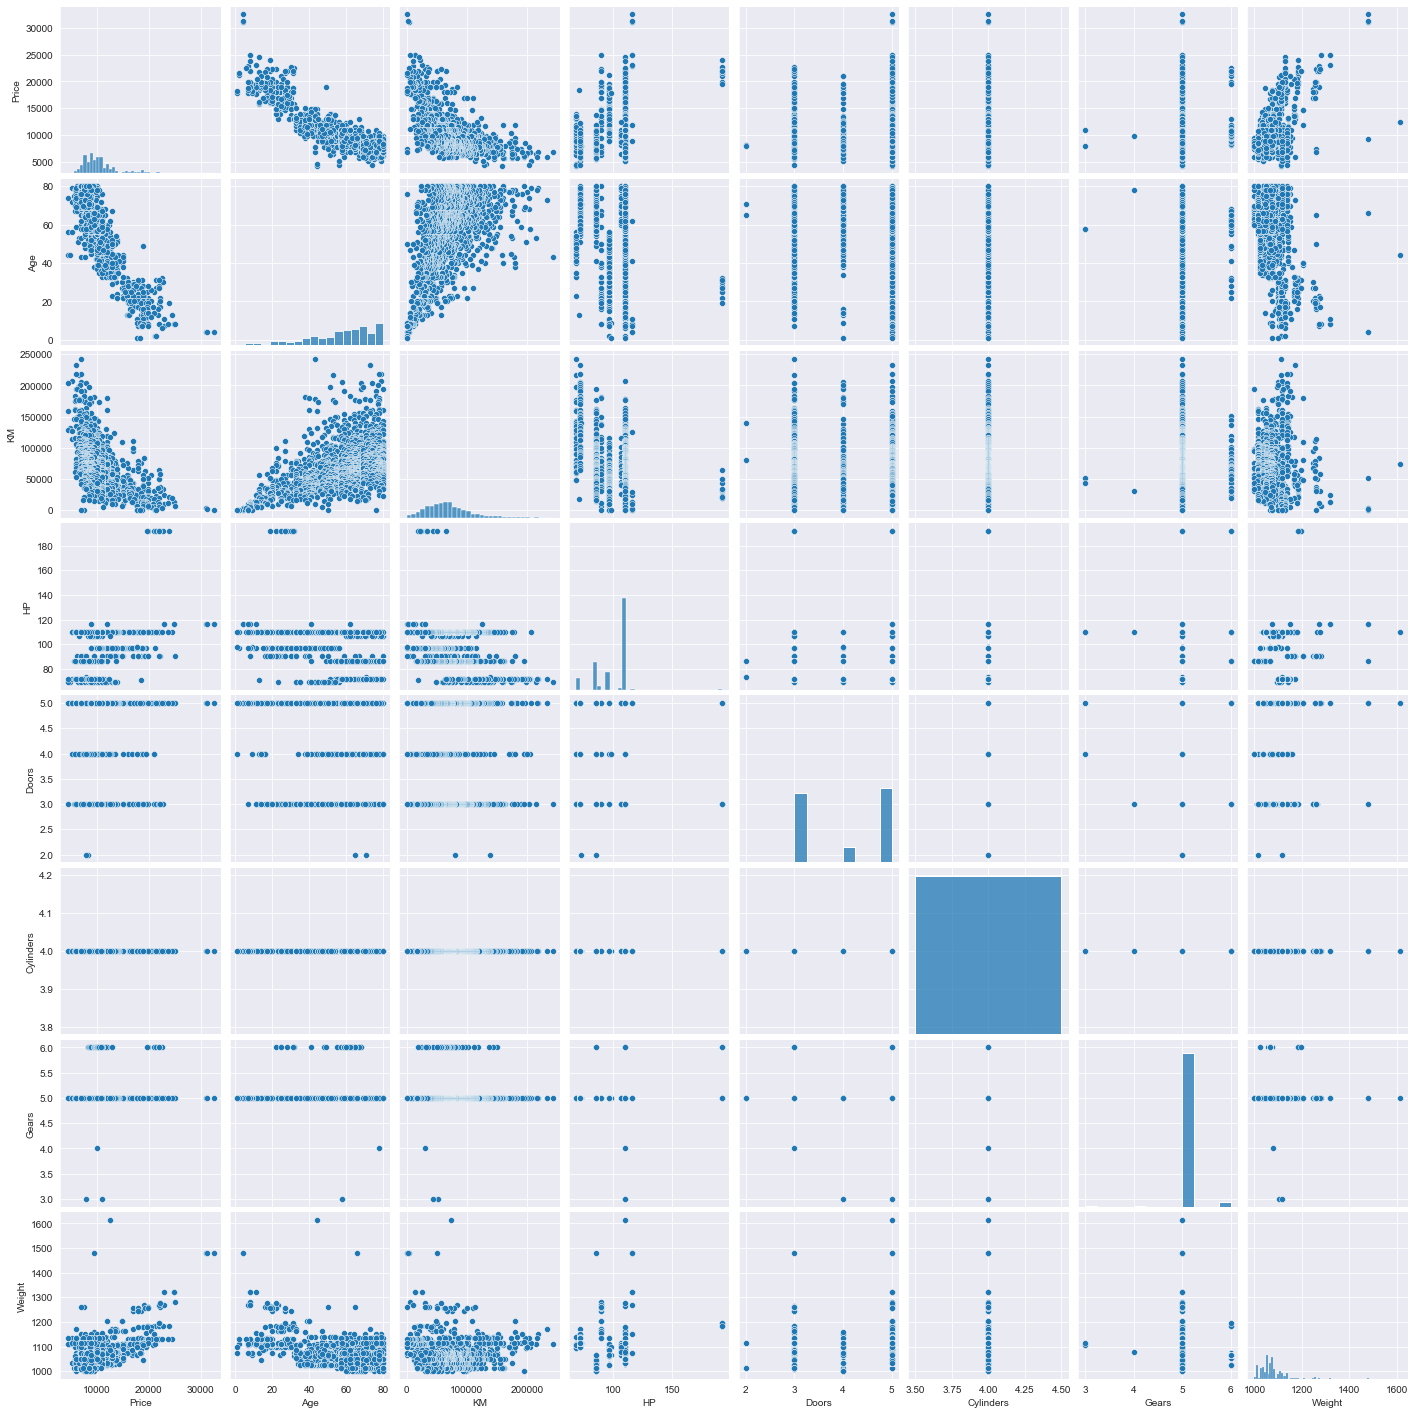

In [30]:
sn.set_style(style='darkgrid')
sn.pairplot(car_price)

### Heatmaps

Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

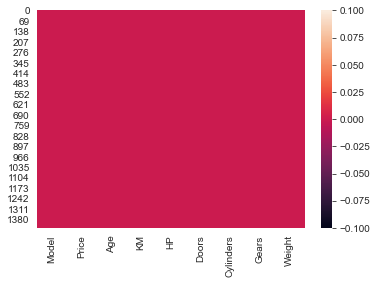

In [31]:
sn.heatmap(car_price.isnull())

### Observations :- 

1. We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background. 

We can check missing values by using isna() method as well.

In [32]:
car_price.isna().sum()

Model        0
Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Correlation

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

<AxesSubplot:>

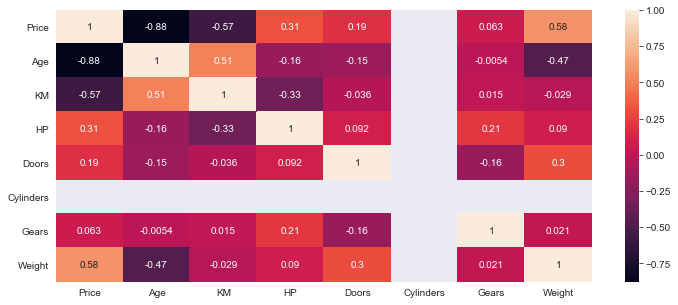

In [33]:
plt.figure(figsize=(12,5))
sn.heatmap(car_price.corr(),annot = True)

In [34]:
car_price.corr()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


### Observations :- 

The cylinders show correlation value as NaN, as the cylinder value is 4 (constant throughout the dataset)

# Fitting a linear regression model

In [35]:
model = smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data=car_price).fit()

In [36]:
model.params

Intercept    -410.845504
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [37]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        05:17:14   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     4.65e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Here we have all the features with less than 0.05 p value, so there is no multicollinearity problem

# R squared values

In [38]:
(model.rsquared,model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)

# Calculating VIF as well to check collinearity

In [39]:
rsq_age = smf.ols('Age~KM+HP+Doors+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+Doors+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+Doors+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_doors = smf.ols('Doors~Age+KM+HP+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_doors = 1/(1-rsq_doors) 

rsq_cylinders = smf.ols('Cylinders~Age+KM+HP+Doors+Gears+Weight',data=car_price).fit().rsquared  
vif_cylinders = 1/(1-rsq_cylinders)

rsq_gears = smf.ols('Gears~Age+KM+HP+Doors+Cylinders+Weight',data=car_price).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_weight = smf.ols('Weight~Age+KM+HP+Doors+Cylinders+Gears',data=car_price).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

# Storing vif values in a data frame
d1 = {'Features':['Age','KM','HP','Doors','Cylinders','Gears','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_doors,vif_cylinders,vif_gears,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

C:\Users\91982\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,Age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


Here, VIF value is <20 for all the variables, so we can confirm collinearlity does not exist

# Residual analysis

### Test for Normality of Residuals (Q-Q Plot)

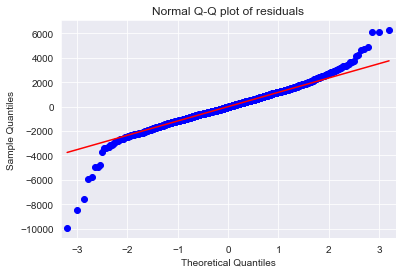

In [40]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

We can see most of the points are very close and on the line in the above plot. Although, there are few data points that are away from the straight line and we will try to remove those influencer points with the help of Cook's distance, Hat - point method.


### Residual Plot for Homoscedasticity

In [41]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

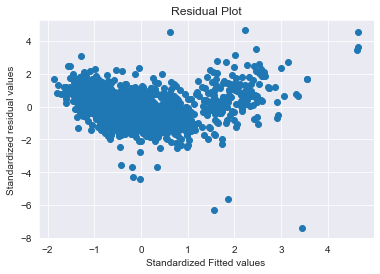

In [42]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residuals vs Regressors

### For Age 

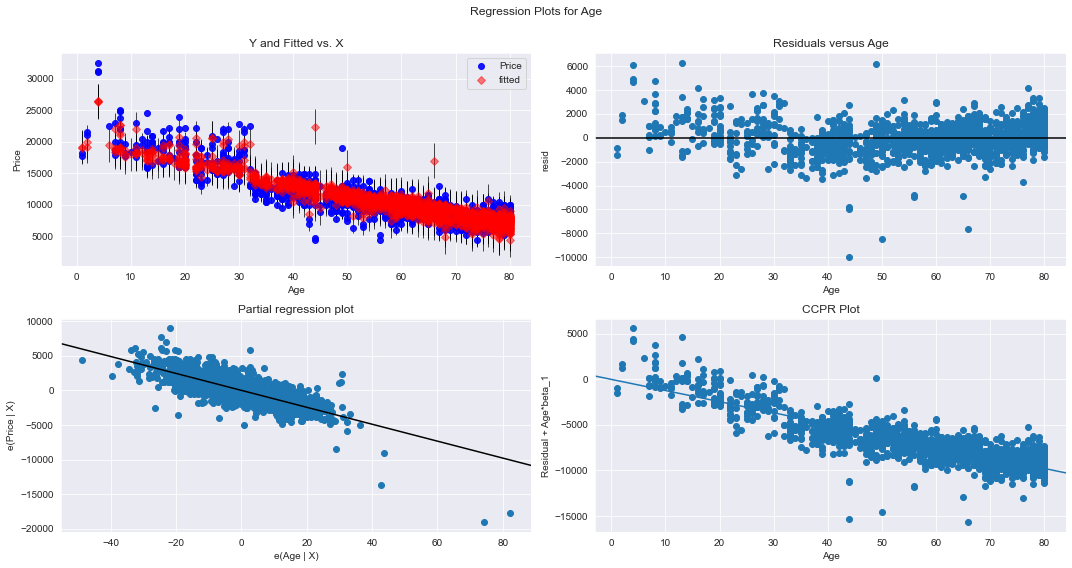

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

### For KM

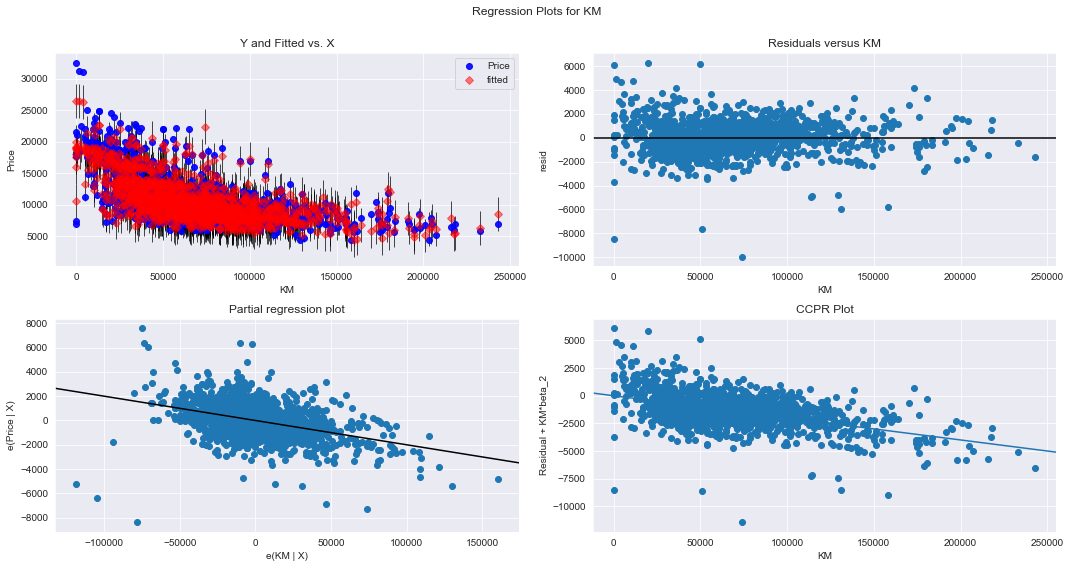

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

### For HP

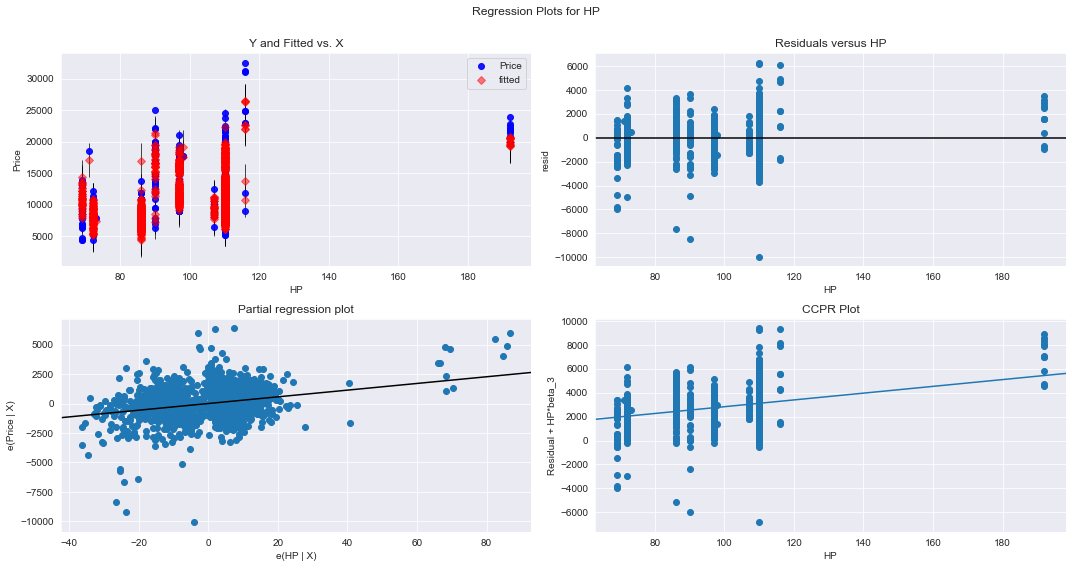

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

### For Doors

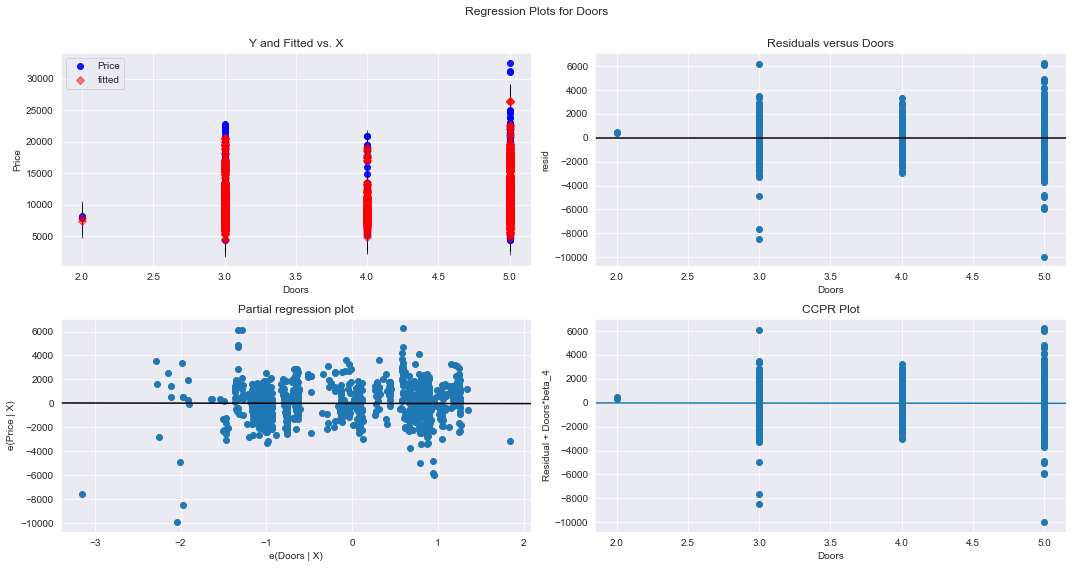

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

### For Gears

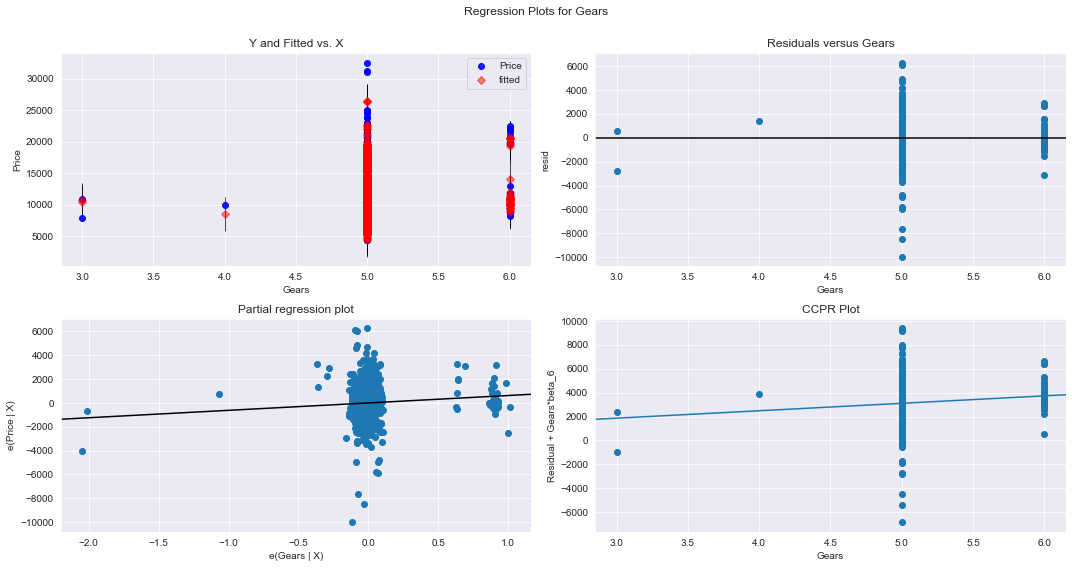

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

### For Weight

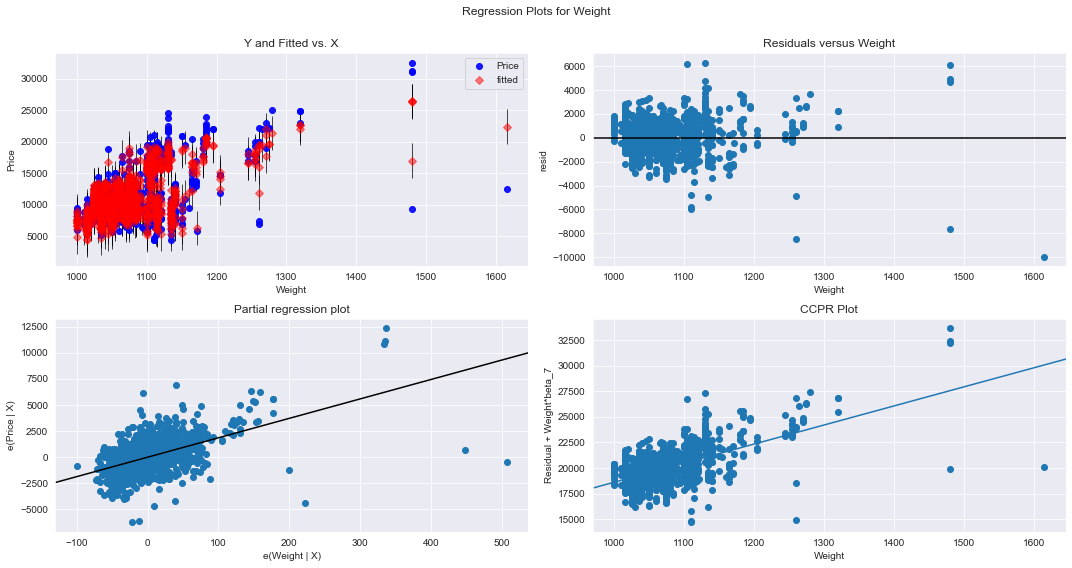

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

### Using Cook's distance to detect Influencers/Outliers

In [49]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

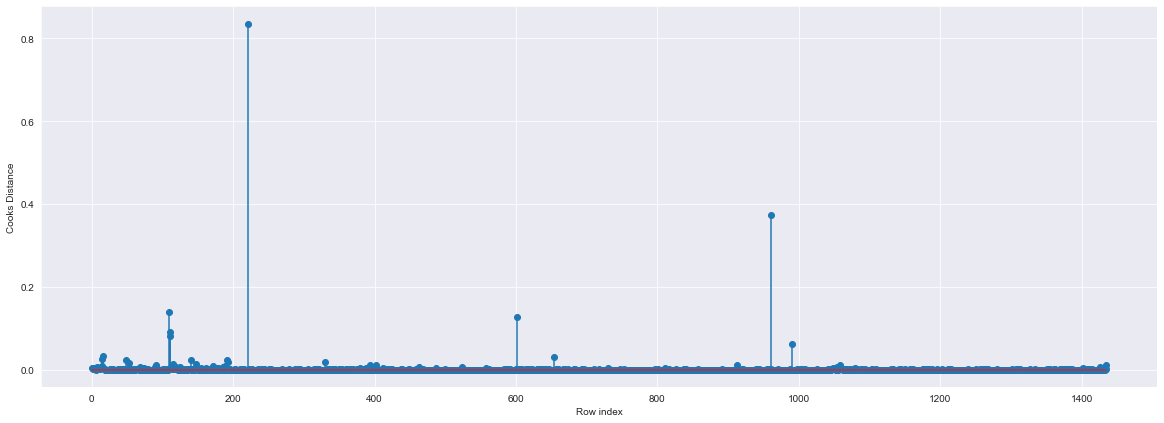

In [50]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car_price)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:

(np.argmax(c),np.max(c))

(221, 0.8359007508853545)

### High Influence points

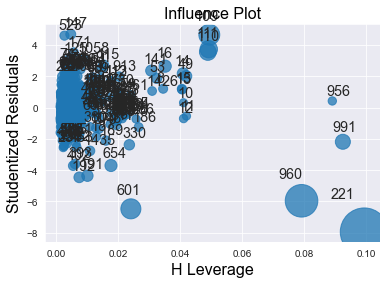

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [53]:
k = car_price.shape[1]
n = car_price.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [54]:
leverage_cutoff

0.020891364902506964

From the above plot, we can see that the data points 601,960,991,956,221 are influencers (age,km features specifically)

In [55]:
car_price[car_price.index.isin([601,960,221,991,956])]

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
221,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
601,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,1,90,3,4,5,1260
956,TOYOTA Corolla 1.6 Linea Luna Aut. 4/5-Doors,10950,58,51421,110,5,4,3,1105
960,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480
991,TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors,7950,58,43000,110,4,4,3,1114


In [56]:
car_price.head()

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


### Improving the model

Discard the data points which are influencers and reasign the row number (reset_index())

In [57]:
toyoto =car_price.drop(car_price.index[[601,960,221,991,956]],axis=0).reset_index()

In [58]:
toyoto.shape

(1431, 10)

In [59]:
toyoto

,index,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1427,1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1428,1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1429,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [60]:
#Drop the original index
toyoto=toyoto.drop(['index'],axis=1)

In [61]:
toyoto

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1426,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1427,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1428,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1429,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


### Second iteration of Model

In [62]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto).fit()

In [63]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8780828565178544, 24523.221783395824)

### Using Cook's distance to detect Influencers/Outliers

In [64]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

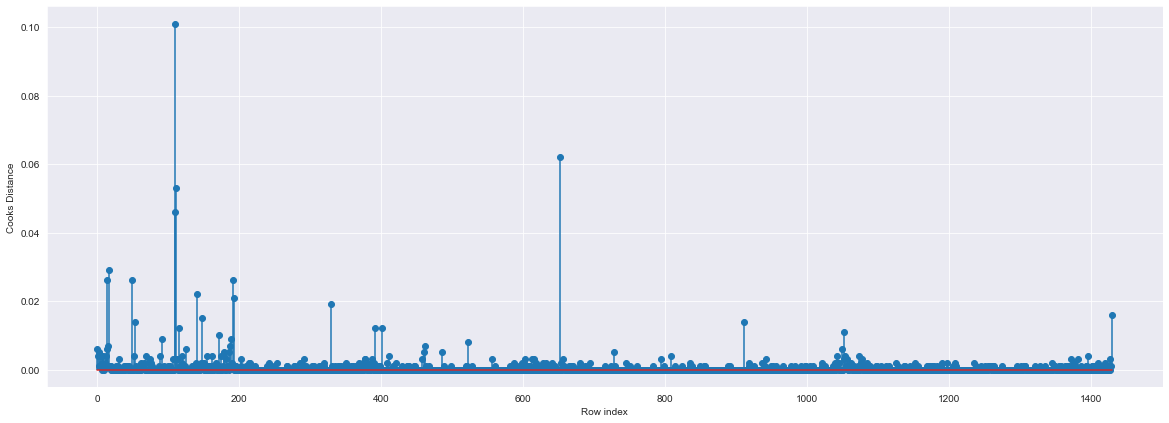

In [65]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [66]:
(np.argmax(c_V),np.max(c_V))

(109, 0.10082355562508787)

### High Influence points

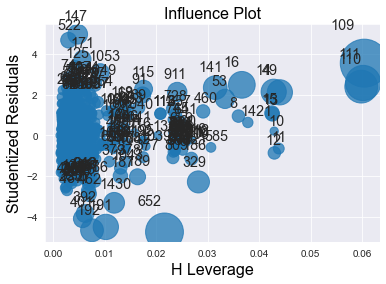

In [67]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_V)
plt.show()

From the above plot, we can see that the data points 109 and 110 are influencers 

### Improving the model accuracy by deleting the influencer points

In [68]:
toyoto2=toyoto.drop(toyoto.index[[109,]],axis=0)

In [69]:
toyoto2.shape

(1430, 9)

In [70]:
#Reset the index and re arrange the row values
toyoto2=toyoto2.reset_index()

In [71]:
toyoto2=toyoto2.drop(['index'],axis=1)

In [72]:
toyoto2

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1425,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1426,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1427,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1428,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [73]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto2).fit()

In [74]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8760401697366793, 24494.4397482384)

In [75]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

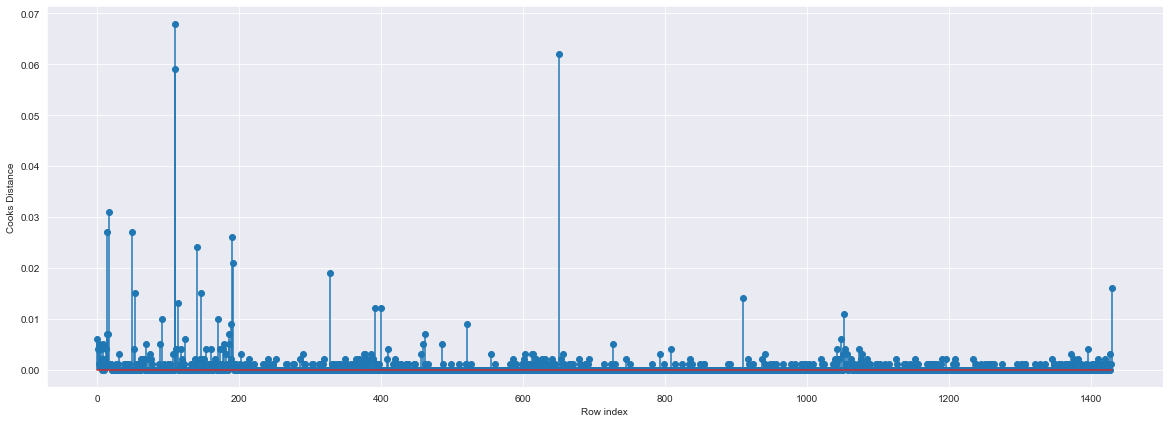

In [76]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [77]:
(np.argmax(c_V),np.max(c_V))

(110, 0.06797937297919386)

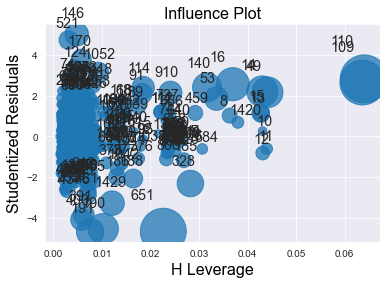

In [78]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_V)
plt.show()

From the above plot, we can see that the data points 109 and 110 are influencers 

In [79]:
toyoto2[toyoto2.index.isin([109,110,651])]

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
109,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31000,4,4000,116,5,4,5,1480
110,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31275,4,1500,116,5,4,5,1480
651,TOYOTA Corolla 2.0 D Linea Terra 3d 2/3-Doors,6950,65,114383,90,3,4,5,1260


In [80]:
toyoto3 =toyoto2.drop(toyoto2.index[[109,110,651]],axis=0).reset_index()

In [81]:
toyoto3.shape

(1427, 10)

In [82]:
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto3).fit()

In [83]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

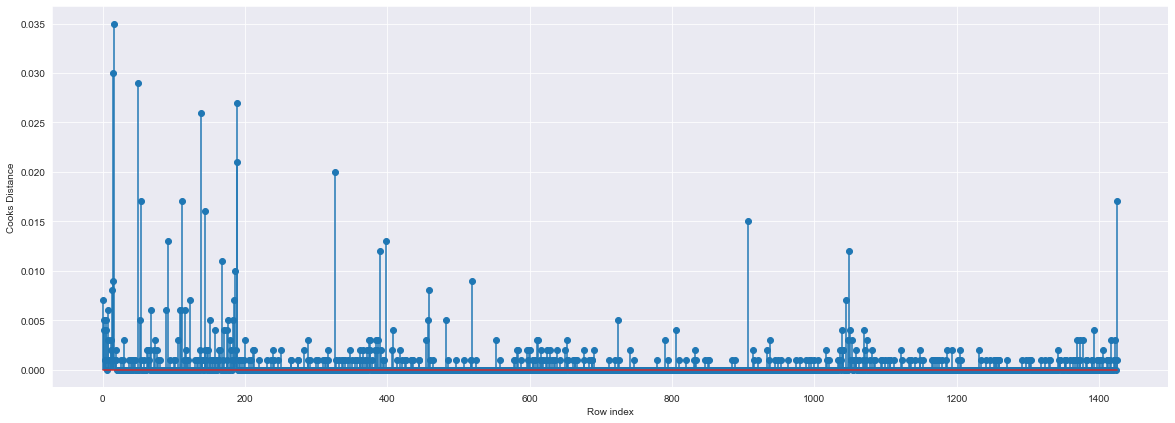

In [84]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

Since we have Cook's distance value <0.1, we can stop diagnostic process

# Check the accuracy of the mode

In [85]:

final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto3).fit()

In [86]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8732943113563791, 24409.857638122445)

In [87]:
(final_ml_V.rsquared,final_ml_V.rsquared_adj)

(0.8732943113563791, 0.8727589352071807)

# Predicting for new data

In [88]:
#New data for prediction
new_data=pd.DataFrame({'Age':22,"KM":4500,"HP":100,"Doors":3,"Cylinders":4,"Gears":5,"Weight":1000},index=[1])

In [89]:
final_ml_V.predict(new_data)

1    14468.496429
dtype: float64